Importing

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

MAIN_DIR = "D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Dataset"
SEED = 40
os.listdir(MAIN_DIR)

['aii ki matra',
 'cha',
 'ee ki matra',
 'ka',
 'la',
 'ma',
 'ma with oo ki matra',
 'nna',
 'nnna',
 'nu',
 'nuu',
 'oo',
 'pa',
 'ra',
 't',
 'tha',
 'va',
 'vee',
 'vu',
 'y',
 'ya']

In [3]:
def load_images(folder):
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                if img.shape[-1] == 1:
                    # convert grayscale image to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img = cv2.resize(img,(224,224))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [4]:
data, labels = load_images(MAIN_DIR)

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)

y_one_hot = to_categorical(y, num_classes=21) # One-hot encode the target variable

norm_data = data / 255. 
norm_data.shape, norm_data[0]

((2698, 224, 224, 3),
 array([[[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.4       , 0.50588235],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        ...,
 
        [[0.16470588, 0.36862745, 0.48627451],
         [0.1647058

In [6]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_data.shape)
print("Test Labels Shape:", test_labels.shape)

Train Data Shape: (2158, 224, 224, 3)
Train Labels Shape: (2158,)
Test Data Shape: (540, 224, 224, 3)
Test Labels Shape: (540,)


In [7]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=21)
test_labels = to_categorical(test_labels, num_classes=21)

In [8]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the MobileNet model
base_model = MobileNet(include_top=False, weights='imagenet', input_shape=norm_data.shape[1:])

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(21, activation='softmax')(x)

# Create the MobileNet model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/50
68/68 [==============================] - 37s 515ms/step - loss: 2.0585 - accuracy: 0.3883 - val_loss: 1.4672 - val_accuracy: 0.5333
Epoch 2/50
68/68 [==============================] - 33s 489ms/step - loss: 0.9624 - accuracy: 0.6965 - val_loss: 0.8035 - val_accuracy: 0.7574
Epoch 3/50
68/68 [==============================] - 32s 470ms/step - loss: 0.6744 - accuracy: 0.8040 - val_loss: 0.6643 - val_accuracy: 0.7667
Epoch 4/50
68/68 [==============================] - 30s 446ms/step - loss: 0.4967 - accuracy: 0.8406 - val_loss: 0.6876 - val_accuracy: 0.7685
Epoch 5/50
68/68 [==============================] - 29s 426ms/step - loss: 0.4498 - accuracy: 0.8698 - val_loss: 0.5112 - val_accuracy: 0.8259
Epoch 6/50
68/68 [==============================] - 28s 415ms/step - loss: 0.3651 - accuracy: 0.8823 - val_loss: 0.5422 - val_accuracy: 0.8204
Epoch 7/50
68/68 [==============================] - 28s 417ms/step - loss: 0.3199 - accuracy: 0.8976 - val_loss: 0.4490 - val_accuracy: 0.8500

In [9]:
model.save("MobileNet_3.h5")

In [10]:
# Evaluate the model on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)

accuracy = np.mean(predicted_labels == true_labels)
print('Accuracy:', accuracy*100)

17/17 [==============================] - 10s 606ms/step - loss: 0.3737 - accuracy: 0.9019
Test Loss: 0.37369054555892944
Accuracy: 90.18518518518519


Running the saved model

In [11]:
# import tensorflow as tf

# # Load the saved model
# model = tf.keras.models.load_model('D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Project\\MobileNet_1.h5')

In [12]:
# model.history

Classification Report

In [13]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

17/17 [==============================] - 8s 458ms/step
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       1.00      0.61      0.76        23
           2       0.94      0.98      0.96        52
           3       0.80      0.80      0.80        35
           4       0.95      0.86      0.90        21
           5       0.93      0.85      0.89        33
           6       0.94      0.94      0.94        32
           7       0.90      0.68      0.78        28
           8       0.73      0.94      0.82        17
           9       0.87      0.96      0.91        27
          10       0.97      1.00      0.98        28
          11       0.86      0.96      0.91        26
          12       0.94      1.00      0.97        17
          13       1.00      0.95      0.97        20
          14       1.00      0.97      0.99        34
          15       0.76      0.87      0.81        15
          16       0.97   

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

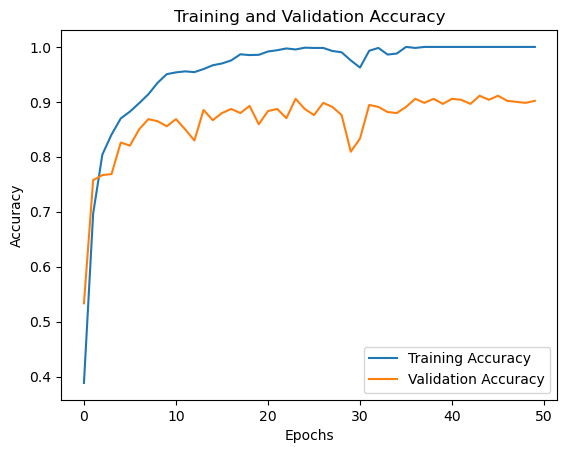

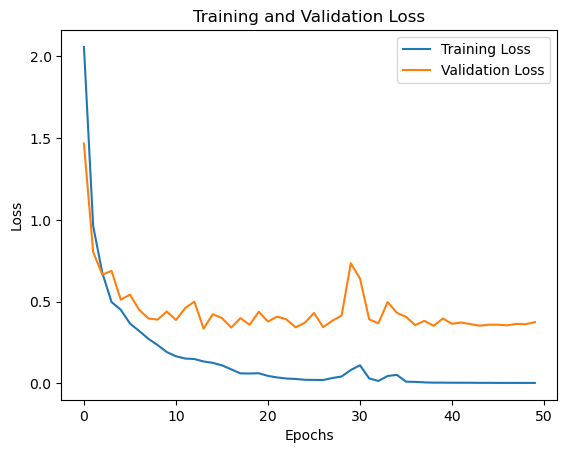

In [15]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting graphs with the saved model

In [16]:
# history = model.history

In [17]:
# # Plot training and validation accuracy
# plt.plot(model.history.history['accuracy'], label='Training Accuracy')
# plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.plot(model.history.history['loss'], label='Training Loss')
# plt.plot(model.history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()